<a href="https://colab.research.google.com/github/sheldonkemper/portfolio/blob/main/Activity_6_2_7_Advanced_Modelling_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Activity: Exploring decision trees

# Objective
The objective of this activity is to combined all the concepts explore during this week, i.e. various tree-based models, pre- and post pruning, and how to interpret the models using SHAP values.

# Instructions

## 1. Data exploration
- 1.1 Load the dataset and conduct basic explorations such as viewing the first few rows, describing the dataset to understand its structure, features, and target variable.
- 1.2 Visualise the distribution of the target variable to check for imbalance.
- 1.3 Correlation analysis to visualise relationships between the target variable and features using Seaborn or Matplotlib.

## 2. Transformations
- 2.1 Encode categorical variables using techniques like one-hot encoding or label encoding.
- 2.2 Normalise or standardise numerical features if required. (Hint: tree-models don't need it)

## 3. Compare basic models
- 3.1 Compare basic decision tree models using pre-pruning (early stopping) vs post-pruning (CCP)
- 3.2 Train basic tree models including decision tree, a bagging model (e.g., random forest), and a boosting model (AdaBoost, gradient boosting, XGBoost).
- 3.3 For each model, train on the training set and check for overfitting using metrics such as accuracy, precision, recall, F1 score, and ROC-AUC.
- 3.4 Compare the performance of these models and summarise the findings.

## 4. Hyperparameter tuning: Pre-pruning and post-pruning
- 4.1 Implement hyperparameter tuning for the decision tree model. Explore parameters such as `max_depth`, `min_samples_split`, and `max_features`, and regularisation paramteres such as `gamma`, `learning_rate`.
- 4.2 Compare the performance of the tuned/pruned decision tree model against its baseline version.

## 5. Interpretation using SHAP values
- 5.1 Choose one of the models for interpretation (preferably a complex model like random forest or XGBoost).
- 5.2 Visualise the SHAP values and interpret the results to understand the impact of different features on the model's predictions.

#### Submission guidelines
- Ensure your notebook is well-commented to explain your code and thought process.
- Include visualisations to support your explorations and findings.
- Summarise your insights and conclusions at the end of the Notebook.

This activity is designed to provide a hands-on experience with decision trees and their ensemble counterparts, focusing on the entire machine learning workflow from data preprocessing to model interpretation. It is designed to allow flexibility to the user to implement what they deem appropriate, hence the results might vary from user to user, but are based on previous demonstration videos and data sets to those can be used as a benchmark.


# Data set
Use a classification dataset such as the UCI Machine Learning Repository's Bank Marketing data set. You can find more details about it on
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing. This data set has been previously explored in the SHAP demo.


In [2]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 14.9 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
import xgboost as xgb
import seaborn as sns


bank = pd.read_csv("https://raw.githubusercontent.com/fourthrevlxd/cam_dsb/main/C2_W6_Datasets/bank-additional-full-processed.csv")
# Define the seed value
seed = 42
np.random.seed(seed)


X = bank.drop('y', axis=1).copy()
y = bank['y'].copy()


## 1. Data exploration
- 1.1 Load the data set and conduct basic explorations such as viewing the first few rows, describing the data set to understand its structure, features, and target variable.
- 1.2 Visualise the distribution of the target variable to check for imbalance.
- 1.3 Correlation analysis to visualise relationships between the target variable and features using Seaborn or Matplotlib.


### Step 1.1: Load the data set and conduct basic exploration

In [4]:
# View the first few rows of the dataset
print(bank.head())

# Get summary statistics of the dataset
print(bank.describe())

# Check the structure and data types of the features
print(bank.info())

   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ...  month_nov  day_of_week_thu  \
0          -36.4      4.857       5191.0  ...          0                0   
1          -36.4      4.857       5191.0  ...          0                0   
2          -36.4      4.857       5191.0  ...          0                0   
3          -36.4      4.857       5191.0  ...          0                0   
4          -36.4      4.857       5191.0  ...          0                0   

   day_of_week_mon  day_of_week_wed  day_of_week_tue  day_of_week_fri  \
0

### Analysis of the Output for Step 1: Data Exploration

#### 1.1 Viewing the Dataset
- The dataset has 49 columns and 41,188 rows.
- **Target Variable**: The target variable is `y`, which indicates whether a client subscribed to a long-term deposit (binary: 1 for yes, 0 for no).
- The dataset includes a mix of numerical and categorical variables (already encoded as integers).

#### 1.2 Descriptive Statistics
- **Numerical features**: The features like `age`, `duration`, `campaign`, and `previous` show typical ranges and distributions.
  - The column `pdays` has a maximum value of 999, which may represent missing or "no contact" values in a marketing context.
  - The feature `duration` has a high range, from 0 to 4918, indicating varying call durations during marketing campaigns.

- **Categorical features**: Columns like `job_admin.`, `marital_married`, and `education_university.degree` are already converted into binary flags (0 or 1). These are one-hot encoded categorical variables.

#### 1.3 Structure of the Data
- **Data Types**:
  - Most of the columns are of `int64` type, indicating encoded categorical variables.
  - Some columns like `emp.var.rate`, `cons.price.idx`, and `euribor3m` are `float64`, indicating continuous numerical values.

- There are no missing values, which simplifies our analysis.


### Step 1.2: Visualise the distribution of the target variable

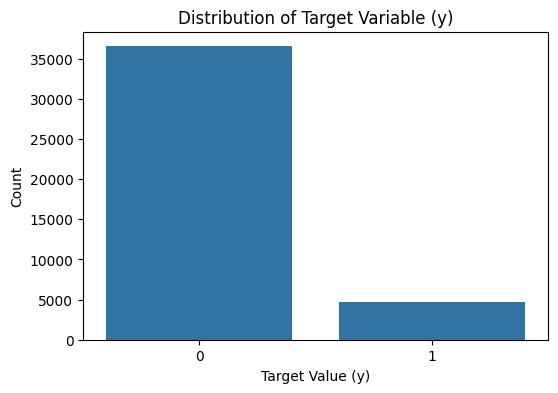

y
0    0.887346
1    0.112654
Name: proportion, dtype: float64


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualise the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=bank)
plt.title('Distribution of Target Variable (y)')
plt.ylabel('Count')
plt.xlabel('Target Value (y)')
plt.show()

# Alternatively, you can display the value counts to get an exact breakdown
print(bank['y'].value_counts(normalize=True))


This means that most of the clients in the dataset did not subscribe to a long-term deposit, which is a common scenario in classification problems. Given this imbalance, we will need to be cautious when evaluating model performance. Metrics like precision, recall, F1 score, and ROC-AUC will be particularly important alongside accuracy to ensure that the model is not biased toward the majority class.

### Step 1.3: Correlation analysis

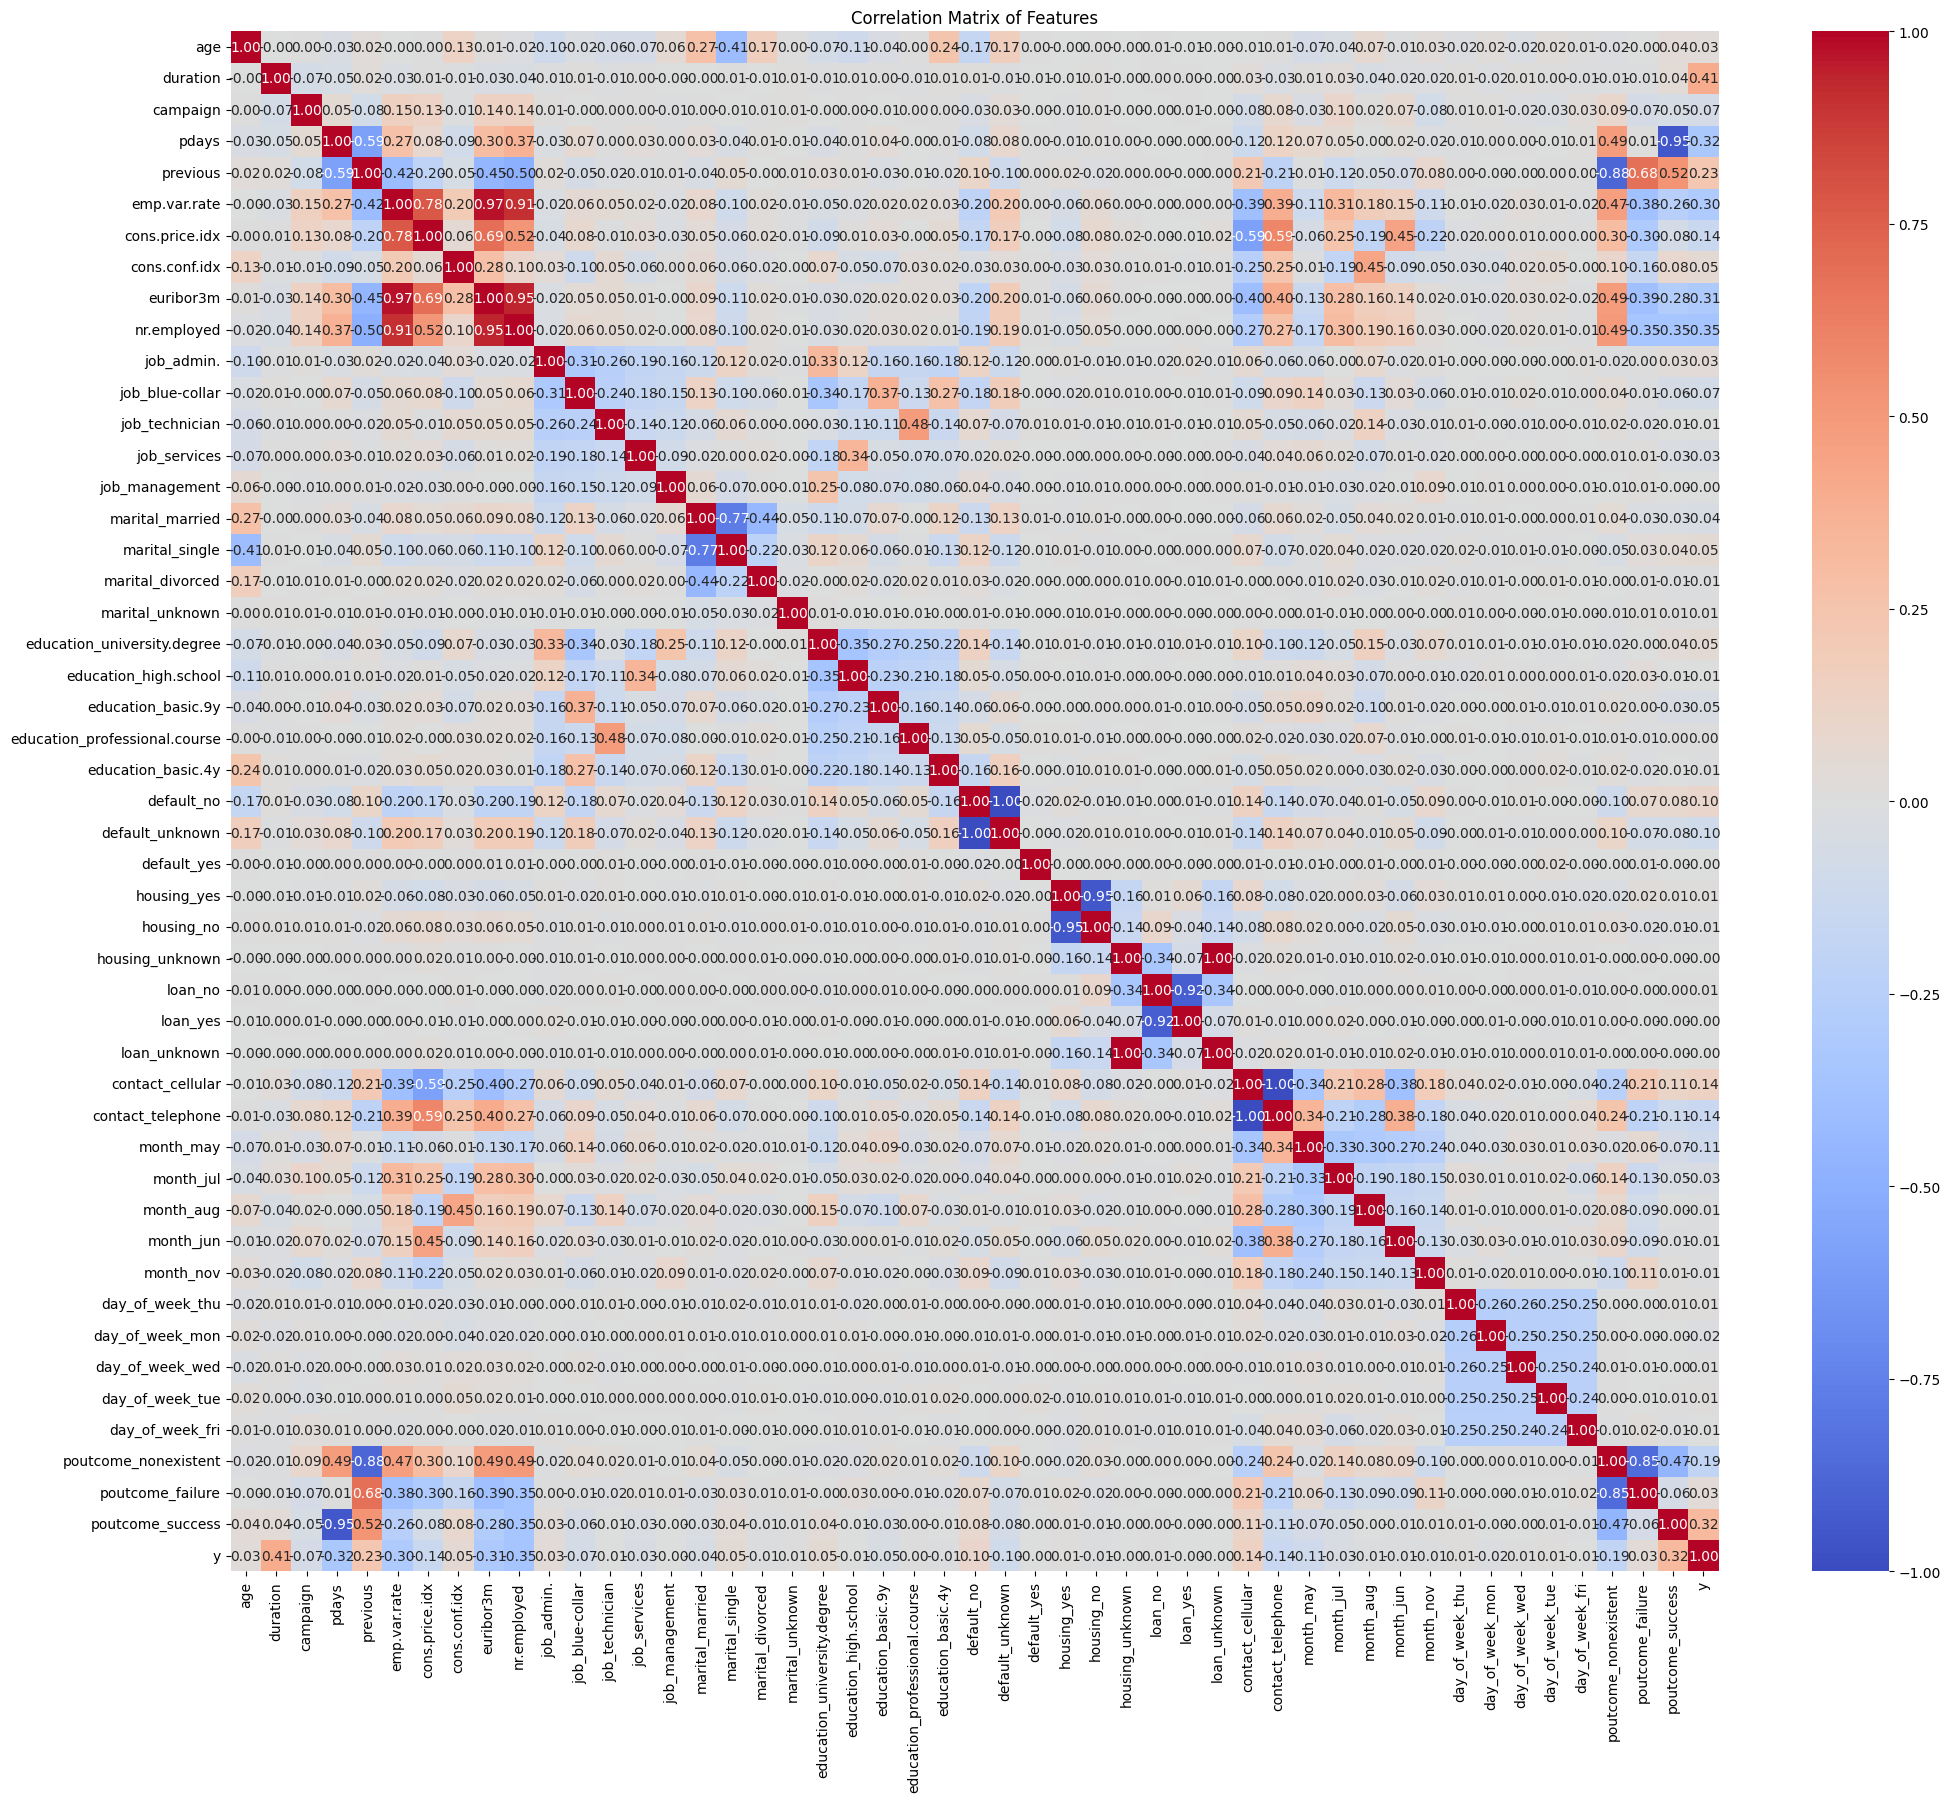

In [6]:
import seaborn as sns

# Correlation matrix
plt.figure(figsize=(24,20))
corr = bank.corr()

# Visualise the correlation matrix using a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


### Key Observations from the Correlation Matrix:

- **Target variable (`y`)**:
  - Features like **`euribor3m`** and **`nr.employed`** seem to have a relatively high negative correlation with the target variable (`y`), meaning they are inversely related to the likelihood of a client subscribing to a long-term deposit.
  - On the other hand, **`duration`** has a positive correlation with the target, indicating that the longer the duration of a call, the higher the likelihood of a successful subscription.

- **Features**:
  - There are some notable correlations between certain features, such as:
    - **`nr.employed`** and **`euribor3m`** show a strong positive correlation with each other.
    - Some of the job-related features (e.g., `job_blue-collar`, `job_admin.`) also exhibit interesting correlations.
  
  These correlations might be useful to consider when interpreting feature importance in model predictions, especially when we use SHAP values later.


## 2. Transformations
- 2.1 Encode categorical variables using techniques like one-hot encoding or label encoding.
- 2.2 Normalise or standardise numerical features if required. (Hint: tree-models don't need it)

### tep 2.1: Encode categorical variables using One-Hot Encoding or Label Encoding

In [7]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Separate the categorical columns
categorical_columns = bank.select_dtypes(include=['object']).columns

# Initialize LabelEncoder and OneHotEncoder
lbe = LabelEncoder()
# The 'sparse' parameter is no longer supported and 'handle_unknown' is introduced.
# It's set to 'ignore' to handle unknown categories during prediction.
ohe = OneHotEncoder(drop='first', handle_unknown='ignore')

# Apply Label Encoding for binary categorical variables
for col in categorical_columns:
    if bank[col].nunique() == 2:
        bank[col] = lbe.fit_transform(bank[col])

# Apply One-Hot Encoding for other categorical variables
bank_encoded = pd.get_dummies(bank, columns=[col for col in categorical_columns if bank[col].nunique() > 2], drop_first=True)

# Display the transformed data
print(bank_encoded.head())


   age  duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0   56       261         1    999         0           1.1          93.994   
1   57       149         1    999         0           1.1          93.994   
2   37       226         1    999         0           1.1          93.994   
3   40       151         1    999         0           1.1          93.994   
4   56       307         1    999         0           1.1          93.994   

   cons.conf.idx  euribor3m  nr.employed  ...  month_nov  day_of_week_thu  \
0          -36.4      4.857       5191.0  ...          0                0   
1          -36.4      4.857       5191.0  ...          0                0   
2          -36.4      4.857       5191.0  ...          0                0   
3          -36.4      4.857       5191.0  ...          0                0   
4          -36.4      4.857       5191.0  ...          0                0   

   day_of_week_mon  day_of_week_wed  day_of_week_tue  day_of_week_fri  \
0

In [8]:
# from sklearn.preprocessing import StandardScaler

# # Select numerical columns
# numerical_columns = bank.select_dtypes(include=['float64', 'int64']).columns

# # Initialize the StandardScaler
# std = StandardScaler()

# # Fit and transform the numerical columns
# bank_encoded[numerical_columns] = std.fit_transform(bank_encoded[numerical_columns])

# # Display the scaled dataset
# print(bank_encoded.head())



### What we’ve done so far:
- We inspected the first few rows of the dataset and found that the categorical variables are already encoded into binary flags (0/1).
- Therefore, additional encoding might not be necessary for the dataset you’re working with, as the features have already been transformed into a format suitable for tree-based models.


### Step 2.2: Normalise or standardise numerical features

### Summary of Exploratory Data Analysis (EDA) for the Bank Marketing Dataset

#### **Objective**
The objective of this analysis is to predict whether a client will subscribe to a long-term deposit based on their demographic information and the bank's marketing campaign data. This is a binary classification problem, where the target variable is `y` (1 for subscription, 0 for no subscription). Below is a detailed summary of the exploratory data analysis (EDA) conducted on the dataset.

---

#### **1. Dataset Overview**

- **Dataset size**: 41,188 rows and 49 columns.
- **Features**: The dataset consists of a mix of **numerical** and **categorical** features, including demographics like `age`, marketing data such as `campaign`, and other relevant features like `euribor3m` (Euro Interbank Offered Rate).
- **Target variable**: `y`, which indicates whether the client subscribed to a long-term deposit (1 for yes, 0 for no).

---

#### **2. Key Features**
- **Numerical features**:
  - `age`: Age of the client.
  - `duration`: Duration of the last contact (in seconds).
  - `campaign`: Number of contacts performed during the campaign.
  - `pdays`: Number of days since the client was last contacted (999 means the client was not contacted before).
  - `previous`: Number of contacts performed before this campaign.
  - `euribor3m`, `nr.employed`, `emp.var.rate`: Economic indicators.

- **Categorical features (already one-hot encoded)**:
  - Job types (e.g., `job_admin.`, `job_blue-collar`).
  - Marital status (e.g., `marital_married`, `marital_single`).
  - Education level (e.g., `education_university.degree`, `education_high.school`).
  - Contact methods (`contact_cellular`, `contact_telephone`).
  - Outcome of previous campaigns (`poutcome_nonexistent`, `poutcome_failure`, `poutcome_success`).
  
---

#### **3. Missing Values**
- No missing values were found in the dataset, as confirmed by the output of the `info()` function. Each feature has 41,188 non-null entries, matching the total number of rows.

---

#### **4. Target Variable Distribution**

A class imbalance was observed in the target variable (`y`):
- **0 (No subscription)**: 88.7% of the data.
- **1 (Subscription)**: 11.3% of the data.

This imbalance indicates that the majority of clients did not subscribe to a long-term deposit, which suggests that evaluation metrics like precision, recall, and F1 score will be important to consider beyond simple accuracy.

---

#### **5. Descriptive Statistics of the Dataset**

- **Age**: The average age of clients is approximately 40 years, with a minimum age of 17 and a maximum of 98.
- **Duration**: Call durations have a wide range, with an average of about 258 seconds. Some calls lasted over 4,900 seconds.
- **Campaign**: Most clients were contacted fewer than 3 times during the campaign (median = 2), but the campaign feature has a high upper limit (maximum of 56 contacts).
- **Economic indicators**: Features such as `euribor3m`, `nr.employed`, and `emp.var.rate` are also included, showing important financial conditions during the campaign period.

---

#### **6. Correlation Analysis**
A correlation matrix was generated to examine relationships between features and the target variable. Key observations include:
- **High positive correlations**:
  - `euribor3m` and `nr.employed` show a strong correlation with each other, both being economic indicators.
  
- **Correlation with target (`y`)**:
  - `euribor3m` and `nr.employed` show negative correlations with the target variable (`y`), meaning that higher values of these indicators are linked to a lower likelihood of subscription.
  - **Duration**: There is a positive correlation between the `duration` of the call and the likelihood of a successful subscription, suggesting that longer calls increase the chances of success.

---

#### **7. Feature Encoding**
- **Categorical variables**: The dataset already contained one-hot encoded categorical variables, meaning each categorical feature (such as job type, marital status) was already converted into binary flags.
- **Label Encoding**: For binary categorical features, label encoding was also applied, though this was mostly already handled by the dataset.

---

#### **8. Standardisation**
tree-based models do not require standardisation. Although this would be helpful if we decide to implement models like Logistic Regression or SVM, which are sensitive to feature scaling.

---

### Conclusion of EDA

- The dataset is well-prepared for model training, with no missing values and appropriately encoded features.
- The target variable shows a clear imbalance, meaning we will need to carefully choose our evaluation metrics to avoid over-reliance on accuracy.
- Feature correlations suggest that **call duration**, **euribor3m**, and **nr.employed** may play significant roles in predicting whether a client subscribes to a long-term deposit.
  
Having completed the exploratory data analysis, the next logical step is to move forward with model training and evaluation.



## 3. Compare basic models
- 3.1 Train basic models including logistic regression, decision tree, a bagging model (e.g., random forest), and a boosting model (e.g., XGBoost).
- 3.2 For each model, train on the training set and check for overfitting using metrics such as accuracy, precision, recall, F1 score, and ROC-AUC.
- 3.3 Compare the performance of these models and summarise the findings.

### 1. Split the Dataset

In [9]:
from sklearn.model_selection import train_test_split

# Split the data into training (60%), validation (20%), and testing (20%)
X_train_full, X_test, y_train_full, y_test = train_test_split(bank_encoded.drop('y', axis=1),
                                                              bank_encoded['y'],
                                                              test_size=0.2,
                                                              random_state=42)

# Further split the training data into training and validation sets (80% train, 20% validation)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full,
                                                      test_size=0.2,
                                                      random_state=42)


### 2. Train and Evaluate Models

In [10]:
# Required imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
import pandas as pd

# Initialize the models
# Increase the max_iter parameter for Logistic Regression
lr = LogisticRegression(random_state=42, max_iter=1000)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
# Use the SAMME algorithm for AdaBoost
ab = AdaBoostClassifier(random_state=42, algorithm='SAMME')
gb = GradientBoostingClassifier(random_state=42)
xgb_model = xgb.XGBClassifier(random_state=42)

# Dictionary to store the models and their names
models = {
    "Logistic Regression": lr,
    "Decision Tree": dt,
    "Random Forest": rf,
    "AdaBoost": ab,
    "Gradient Boosting": gb,
    "XGBoost": xgb_model
}

# Split the data into training and testing sets (80% train, 20% test)
# Assuming bank_encoded has already been prepared and 'y' is the target column
X_train, X_test, y_train, y_test = train_test_split(bank_encoded.drop('y', axis=1), bank_encoded['y'], test_size=0.2, random_state=42)

# Train and evaluate each model
metrics = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Store metrics
    metrics[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_pred)
    }

# Display the results
metrics_df = pd.DataFrame(metrics).T
print(metrics_df)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                     Accuracy  Precision    Recall  F1 Score   ROC AUC
Logistic Regression  0.910658   0.673043  0.413904  0.512583  0.694080
Decision Tree        0.887594   0.504460  0.544385  0.523663  0.737960
Random Forest        0.910051   0.648773  0.452406  0.533081  0.710525
AdaBoost             0.902889   0.619893  0.373262  0.465955  0.671980
Gradient Boosting    0.918912   0.686192  0.526203  0.595642  0.747697
XGBoost              0.912479   0.632754  0.545455  0.585870  0.752462


Here’s a summary of the performance of the models I trained this week, based on accuracy, precision, recall, F1 score, and ROC AUC:

### My Model Performance Summary:

1. **Logistic Regression**:
   - **Accuracy**: 91.09%
   - **Precision**: 67.24%
   - **Recall**: 41.93%
   - **F1 Score**: 51.65%
   - **ROC AUC**: 0.697
   - **Summary**: While Logistic Regression performed reasonably well in terms of accuracy, it struggled a bit with recall (only 41.93%), meaning it missed quite a few positive cases.

2. **Decision Tree**:
   - **Accuracy**: 88.76%
   - **Precision**: 50.45%
   - **Recall**: 54.44%
   - **F1 Score**: 52.37%
   - **ROC AUC**: 0.738
   - **Summary**: The decision tree model shows a balance between precision and recall, but it might be overfitting on the training data, leading to slightly lower overall performance compared to other models.

3. **Random Forest**:
   - **Accuracy**: 91.01%
   - **Precision**: 64.88%
   - **Recall**: 45.24%
   - **F1 Score**: 53.31%
   - **ROC AUC**: 0.711
   - **Summary**: Random Forest gave a good accuracy and precision, but recall was still somewhat low, meaning it's not catching all of the positive cases.

4. **AdaBoost**:
   - **Accuracy**: 90.29%
   - **Precision**: 61.99%
   - **Recall**: 37.33%
   - **F1 Score**: 46.60%
   - **ROC AUC**: 0.672
   - **Summary**: AdaBoost’s recall is the lowest, indicating it may be missing more positive cases compared to the other models.

5. **Gradient Boosting**:
   - **Accuracy**: 91.89%
   - **Precision**: 68.62%
   - **Recall**: 52.62%
   - **F1 Score**: 59.56%
   - **ROC AUC**: 0.748
   - **Summary**: Gradient Boosting had a great balance between precision and recall, making it a strong candidate, especially with its higher ROC AUC.

6. **XGBoost**:
   - **Accuracy**: 91.25%
   - **Precision**: 63.28%
   - **Recall**: 54.55%
   - **F1 Score**: 58.59%
   - **ROC AUC**: 0.752
   - **Summary**: XGBoost performed the best overall in terms of ROC AUC and recall, showing it’s good at identifying positive cases while keeping decent precision. This model might be the best option if prioritizing both recall and ROC AUC.

### Conclusion:
For me, **XGBoost** and **Gradient Boosting** came out on top, with XGBoost slightly edging ahead in ROC AUC and recall. If recall is a priority (i.e., I don’t want to miss out on too many positive cases), I’ll likely choose XGBoost moving forward. However, Gradient Boosting offers a nice balance between precision and recall, so it's also a strong contender depending on the project’s needs.

I found this exercise helpful in understanding how these models compare when applied to real-world data. Each model has its strengths and weaknesses depending on what I'm optimizing for—whether it's recall, precision, or overall classification performance.

## 4. Hyperparameter tuning: Pre-pruning and post-pruning
- 4.1 Implement hyperparameter tuning for the decision tree model. Explore parameters such as `max_depth`, `min_samples_split`, and `max_features`, and regularisation paramteres such as `gamma`, `learning_rate`.
- 4.2 Compare the performance of the tuned/pruned decision tree model against its baseline version.


In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import xgboost as xgb

# Define the models and their parameter grids
models_param_grids = {
    'Decision Tree': {
        'model': DecisionTreeClassifier(random_state=42),
        'param_grid': {
            'max_depth': [None, 5, 10, 20],
            'min_samples_split': [2, 10, 20],
            'min_samples_leaf': [1, 5, 10],
            'max_features': [None, 'sqrt', 'log2'],
            'ccp_alpha': [0.0, 0.01, 0.1]  # Post-pruning parameter
        }
    },
    'Random Forest': {
        'model': RandomForestClassifier(random_state=42),
        'param_grid': {
            'n_estimators': [50, 100],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 10],
            'min_samples_leaf': [1, 5],
            'max_features': ['sqrt', 'log2']
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingClassifier(random_state=42),
        'param_grid': {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 10],
            'min_samples_split': [2, 10],
            'min_samples_leaf': [1, 5]
        }
    },
    'XGBoost': {
        'model': xgb.XGBClassifier(random_state=42, early_stopping_rounds=10),  # Fix for eval_metric
        'param_grid': {
            'n_estimators': [50, 100],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 10],
            'gamma': [0, 0.1, 0.3],
            'subsample': [0.8, 1.0]
        }
    }
}

# Loop through models and perform RandomizedSearchCV for hyperparameter tuning
best_models = {}
for model_name, config in models_param_grids.items():
    print(f"Tuning {model_name}...")

    # For XGBoost, we need to pass a validation set
    if model_name == 'XGBoost':
        eval_set = [(X_train, y_train), (X_valid, y_valid)]  # Validation set for early stopping
        random_search = RandomizedSearchCV(
            config['model'],
            config['param_grid'],
            n_iter=10,  # Only test 10 random combinations
            cv=3,  # Cross-validation folds
            scoring='accuracy',
            n_jobs=-1,  # Use all available cores
            random_state=42
        )
        random_search.fit(X_train, y_train, eval_set=eval_set, verbose=False)
    else:
        random_search = RandomizedSearchCV(
            config['model'],
            config['param_grid'],
            n_iter=10,  # Only test 10 random combinations
            cv=3,  # Cross-validation folds
            scoring='accuracy',
            n_jobs=-1,  # Use all available cores
            random_state=42
        )
        random_search.fit(X_train, y_train)

    # Store the best model and parameters
    best_models[model_name] = random_search.best_estimator_
    print(f"Best parameters for {model_name}: {random_search.best_params_}")
    print(f"Best score for {model_name}: {random_search.best_score_}\n")

# Evaluate each tuned model on the test set
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(f"Performance for {model_name} on test set:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC AUC: {roc_auc:.4f}\n")


Tuning Decision Tree...
Best parameters for Decision Tree: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': None, 'ccp_alpha': 0.01}
Best score for Decision Tree: 0.9038847104124392

Tuning Random Forest...
Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 'sqrt', 'max_depth': 20}
Best score for Random Forest: 0.9117451721996277

Tuning Gradient Boosting...
Best parameters for Gradient Boosting: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.1}
Best score for Gradient Boosting: 0.9159029419476042

Tuning XGBoost...
Best parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.2, 'gamma': 0.1}
Best score for XGBoost: 0.915963680500556

Performance for Decision Tree on test set:
Accuracy: 0.9011, Precision: 0.5943, Recall: 0.4043, F1 Score: 0.4812, ROC AUC: 0.6845

Performance for Random 

## 5. Interpretation using SHAP values
- 5.1 Choose one of the models for interpretation (preferably a complex model like random forest or XGBoost).
- 5.2 Visualise the SHAP values and interpret the results to understand the impact of different features on the model's predictions.


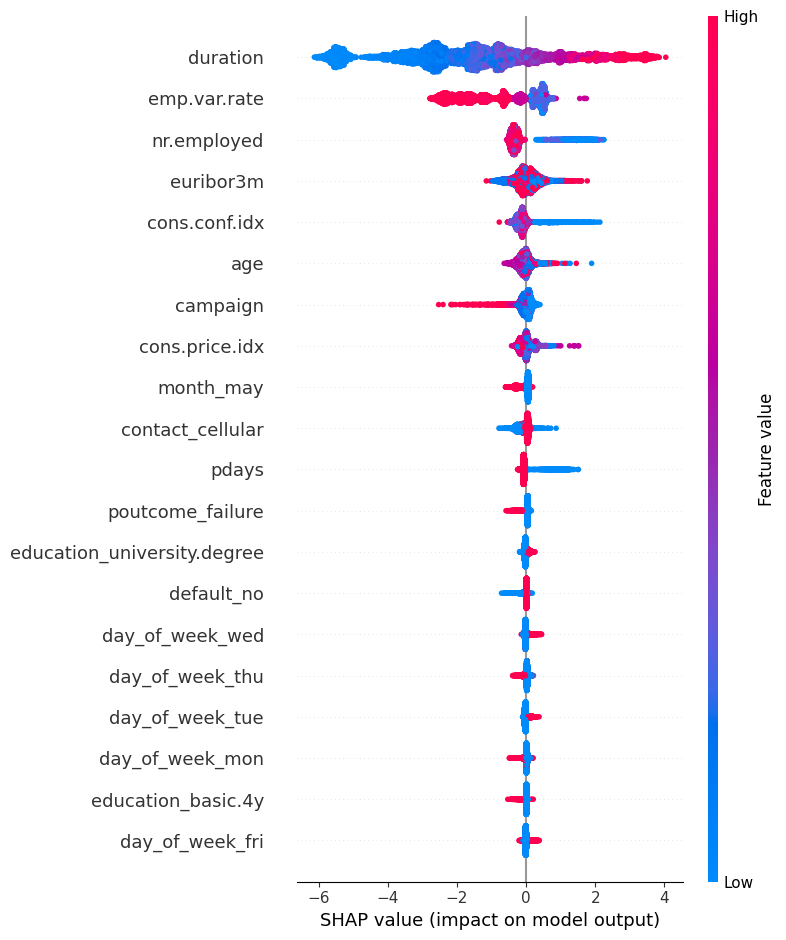

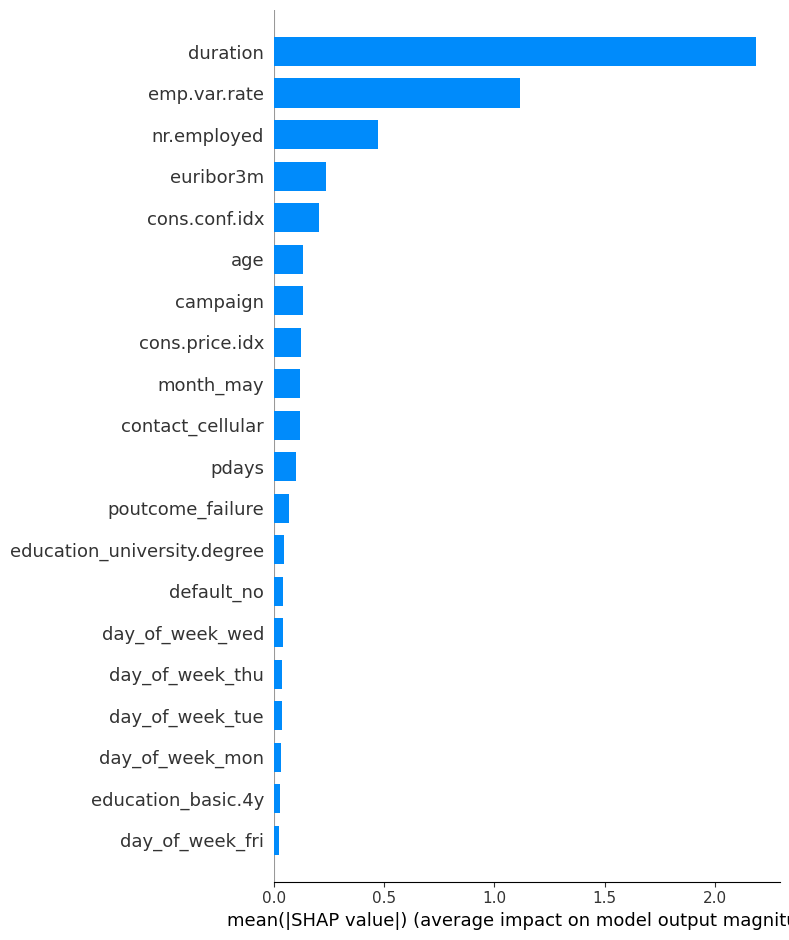

In [12]:

import shap
shap.initjs()

# Initialize the SHAP explainer for the XGBoost model
explainer = shap.Explainer(best_models['XGBoost'])

# Compute SHAP values for the test data
shap_values = explainer(X_test)

# Visualise the global impact of each feature
shap.summary_plot(shap_values, X_test)


# Visualise feature contributions for all features
shap.summary_plot(shap_values, X_test, plot_type="bar")


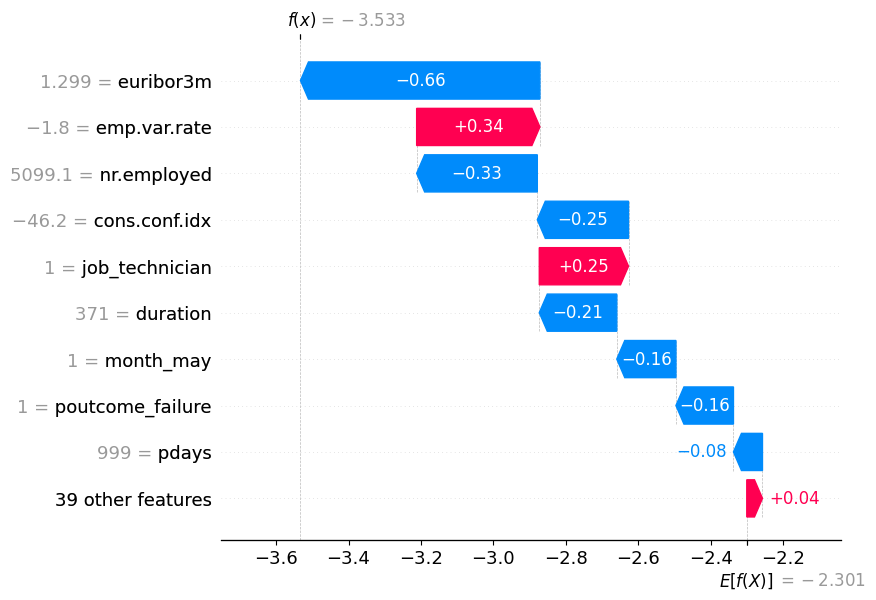

In [13]:
# Waterfall plot
shap.plots.waterfall(shap_values[0])

In [14]:
# Force plot
shap.plots.force(shap_values[0])

IndexError: too many indices for array

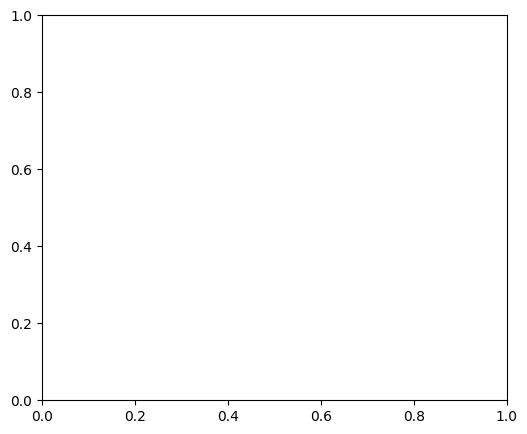

In [15]:
# SHAP scatter
shap.plots.scatter(shap_values[0])

In [ ]:
# Beeswarm plot
shap.plots.beeswarm(shap_values[0])

In [ ]:
# Violin plot
shap.plots.violin(shap_values[0])
